## Promedio y desvío estándar

In [1]:
import pandas as pd

In [2]:
data_spotify=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [3]:
#Me quedo con los playlist: pop, rap, latin
data_pop_rap_latin=data_spotify[data_spotify['playlist_genre'].isin(['pop', 'rap', 'latin'])]
data_pop_rap_latin

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,3jmBWNWrQErNPBPiE0friv,Va a Toa,Farruko,24,4YIgfjNcN2nKob6ib6obEN,TMPR The Most Powerful Rookie,2016-02-22,Los Cangri,2hTs6GuPwhmg4ApNqxWXLE,latin,...,1,-5.166,1,0.0430,0.3930,0.000043,0.5190,0.803,92.001,202449
21355,4HCsKNye8SYImpwXnurwmN,Prrrum - Remix,Cosculluela,0,4lAJ5MS5BlXfyC03rii98I,The Ones,2015-09-25,Los Cangri,2hTs6GuPwhmg4ApNqxWXLE,latin,...,1,-3.076,1,0.2910,0.1670,0.000000,0.0721,0.727,90.034,253600
21356,2Dbq5moIguMsbRZa9SB7gD,Permitame (feat. Yandel),Tony Dize,65,3gvDroaxVajs2EDUABP3C7,La Melodia de la Calle (Remastered),2009,Los Cangri,2hTs6GuPwhmg4ApNqxWXLE,latin,...,8,-7.272,1,0.1830,0.0181,0.000000,0.1130,0.894,214.047,184507
21357,1zOA2VabBnP3ufAH1e5TQJ,Flow Violento,Arcangel,0,439hVywf3XRbR5sXqI6zwG,La Fórmula,2012-10-02,Los Cangri,2hTs6GuPwhmg4ApNqxWXLE,latin,...,9,-6.166,1,0.1440,0.2390,0.000000,0.1040,0.952,80.011,182587


In [27]:
#De mi dataset, me quedo unicamente con las columnas: playlist_genre, duration_ms
data_pop_rap_latin_filtrado=data_pop_rap_latin[['playlist_genre','duration_ms']]
data_pop_rap_latin_filtrado

,playlist_genre,duration_ms
0,pop,194754
1,pop,162600
2,pop,176616
3,pop,169093
4,pop,189052
...,...,...
21354,latin,202449
21355,latin,253600
21356,latin,184507
21357,latin,182587


In [28]:
#Agrupo por: playlist_genre y calculo el promedio
data_pop_rap_latin_filtrado.groupby('playlist_genre').mean()/1000 # duración en segundos

,duration_ms
playlist_genre,
latin,216.863447
pop,217.768104
rap,214.163889


In [29]:
#Agrupo por: playlist_genre y calculo el desvío estándar
data_pop_rap_latin_filtrado.groupby('playlist_genre').std()/1000

,duration_ms
playlist_genre,
latin,48.401258
pop,45.312946
rap,60.265287


De esta primera aproximación a los datos, podemos observar que tenemos promedios muy parecidos pero desvíos estandares no "tan similares". Esto que significa? Bueno justamente este escenario nos denota inicialmente la existencia de valores atípicos o outliers.

## Asimetría y Curtosis

In [30]:
#Importemos la librerias
from scipy.stats import kurtosis, skew

In [31]:
#Empecemos con el concepto de Asimetría
skew(data_spotify['energy'])

-0.6363007693875944

<AxesSubplot:>

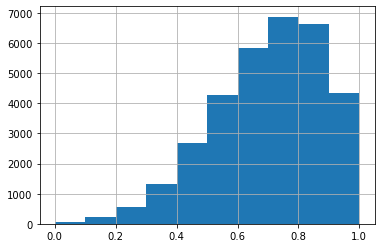

In [32]:
#Grafiquemos
data_spotify['energy'].hist()

In [33]:
#Veamos ahora otra variable!
skew(data_spotify['acousticness'])

1.5947130448327556

<AxesSubplot:>

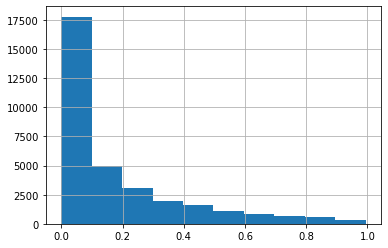

In [34]:
#Grafiquemos
data_spotify['acousticness'].hist()

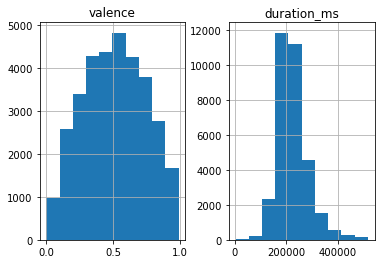

In [35]:
#Analicemos ahora la curtosis para las variables: valence y duration_ms
p = data_spotify[['valence', 'duration_ms']].hist()

In [36]:
data_spotify[['valence', 'duration_ms']].kurtosis()

valence       -0.900981
duration_ms    2.699186
dtype: float64

Interpretación de los valores obtenidos:
 * Si la curtosis me da negativa, significa que hay una menor concentración de datos
en torno a la media y por lo tanto una mayor dispersión.
 * Si la curtosis me da positiva, significa que la variable analizada presenta menor dispersión.